In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# 日本語フォントの指定
mpl.rcParams['font.family'] = 'IPAexGothic' # ここにインストールしたフォント名を入れる

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from nyaggle.feature.category_encoder import TargetEncoder

from nyaggle.experiment import run_experiment

In [2]:
train_ver1 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train_feature_ver1.csv')
test_ver1 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test_feature_ver1.csv')

train_ver2 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train_feature_ver2.csv')
test_ver2 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test_feature_ver2.csv')

era = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/era.csv')
sample_submission = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/sample_submission.csv')

In [3]:
train = pd.concat([train_ver1, train_ver2.iloc[:, 17:]], axis=1)
test = pd.concat([test_ver1, test_ver2.iloc[:, 16:]], axis=1)

In [4]:
#categorical変数抽出
cat_cols = [c for c in test.columns if train[c].dtype == np.object]
#cat_cols.remove('string') # これは取り除かないといけない

# numerical変数抽出
num_cols = [c for c in test.columns if train[c].dtype != np.object]

#目的変数抽出
target_col = 'is_kokuhou'

print(cat_cols)
print(num_cols)
print(target_col)

['棟名', '種別2', '国', '時代', '都道府県 ※美工品は「所有者住所（所在都道府県）」', '所在地', '保管施設の名称', '所有者名', '管理団体又は責任者']
['緯度', '経度', '開始', '終了', '緯度*経度', '終了-開始', 'label_棟名', 'label_種別2', 'label_国', 'label_時代', 'label_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'label_所在地', 'label_保管施設の名称', 'label_所有者名', 'label_管理団体又は責任者', 'count_棟名', 'count_種別2', 'count_国', 'count_時代', 'count_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'count_所在地', 'count_保管施設の名称', 'count_所有者名', 'count_管理団体又は責任者', '棟名_緯度_min', '棟名_緯度_max', '棟名_緯度_mean', '棟名_緯度_std', '棟名_経度_min', '棟名_経度_max', '棟名_経度_mean', '棟名_経度_std', '棟名_開始_min', '棟名_開始_max', '棟名_開始_mean', '棟名_開始_std', '棟名_終了_min', '棟名_終了_max', '棟名_終了_mean', '棟名_終了_std', '棟名_緯度*経度_min', '棟名_緯度*経度_max', '棟名_緯度*経度_mean', '棟名_緯度*経度_std', '棟名_終了-開始_min', '棟名_終了-開始_max', '棟名_終了-開始_mean', '棟名_終了-開始_std', '種別2_緯度_min', '種別2_緯度_max', '種別2_緯度_mean', '種別2_緯度_std', '種別2_経度_min', '種別2_経度_max', '種別2_経度_mean', '種別2_経度_std', '種別2_開始_min', '種別2_開始_max', '種別2_開始_mean', '種別2_開始_std', '種別2_終了_min', '種別2_終了_max', '種別2_終了_mean', '種別2_終了_std', '種

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [5]:
# target encoding

# kf = KFold(4)
# kf = KFold(4, groups=train.categorical)　#GroupKFold
kf = StratifiedKFold(5, shuffle=True, random_state=42531) #StratifiedKFold

# Target encoding with K-fold
# te = TargetEncoder(kf.split(train))
# te = TargetEncoder(kf.split(train)) #GroupKFold
te = TargetEncoder(kf.split(train, train[target_col])) #StratifiedKFold

# use fit/fit_transform to train data, then apply transform to test data
train.loc[:, cat_cols] = te.fit_transform(train[cat_cols], train[target_col])
test.loc[:, cat_cols] = te.transform(test[cat_cols])

In [6]:
print(len(cat_cols) + len(num_cols))

760


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[1]	valid_0's binary_logloss: 0.259189
[2]	valid_0's binary_logloss: 0.255012
[3]	valid_0's binary_logloss: 0.251513
[4]	valid_0's binary_logloss: 0.248598
[5]	valid_0's binary_logloss: 0.246091

/opt/conda/lib/python3.7/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')



[6]	valid_0's binary_logloss: 0.244078
[7]	valid_0's binary_logloss: 0.244182
[8]	valid_0's binary_logloss: 0.242211
[9]	valid_0's binary_logloss: 0.269153
[10]	valid_0's binary_logloss: 0.266157
[11]	valid_0's binary_logloss: 0.263246
[12]	valid_0's binary_logloss: 0.263246
[13]	valid_0's binary_logloss: 0.263639
[14]	valid_0's binary_logloss: 0.260189
[15]	valid_0's binary_logloss: 0.257229
[16]	valid_0's binary_logloss: 0.254838
[17]	valid_0's binary_logloss: 0.252929
[18]	valid_0's binary_logloss: 0.250937
[19]	valid_0's binary_logloss: 0.292731
[20]	valid_0's binary_logloss: 0.287427
[21]	valid_0's binary_logloss: 0.288198
[22]	valid_0's binary_logloss: 0.283759
[23]	valid_0's binary_logloss: 0.279585
[24]	valid_0's binary_logloss: 0.279363
[25]	valid_0's binary_logloss: 0.275534
[26]	valid_0's binary_logloss: 0.271575
[27]	valid_0's binary_logloss: 0.268479
[28]	valid_0's binary_logloss: 0.264986
[29]	valid_0's binary_logloss: 0.262377
[30]	valid_0's binary_logloss: 0.259597
[31

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.258525
[2]	valid_0's binary_logloss: 0.254675
[3]	valid_0's binary_logloss: 0.251011
[4]	valid_0's binary_logloss: 0.247257


/opt/conda/lib/python3.7/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[5]	valid_0's binary_logloss: 0.245284
[6]	valid_0's binary_logloss: 0.243091
[7]	valid_0's binary_logloss: 0.242836
[8]	valid_0's binary_logloss: 0.240813
[9]	valid_0's binary_logloss: 0.269831
[10]	valid_0's binary_logloss: 0.266474
[11]	valid_0's binary_logloss: 0.263156
[12]	valid_0's binary_logloss: 0.263156
[13]	valid_0's binary_logloss: 0.263775
[14]	valid_0's binary_logloss: 0.26119
[15]	valid_0's binary_logloss: 0.258327
[16]	valid_0's binary_logloss: 0.255815
[17]	valid_0's binary_logloss: 0.253814
[18]	valid_0's binary_logloss: 0.251879
[19]	valid_0's binary_logloss: 0.296977
[20]	valid_0's binary_logloss: 0.291856
[21]	valid_0's binary_logloss: 0.292456
[22]	valid_0's binary_logloss: 0.287577
[23]	valid_0's binary_logloss: 0.282843
[24]	valid_0's binary_logloss: 0.282508
[25]	valid_0's binary_logloss: 0.278379
[26]	valid_0's binary_logloss: 0.275252
[27]	valid_0's binary_logloss: 0.271496
[28]	valid_0's binary_logloss: 0.267948
[29]	valid_0's binary_logloss: 0.264549
[30]	v

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.258929
[2]	valid_0's binary_logloss: 0.252141
[3]	valid_0's binary_logloss: 0.247452
[4]	valid_0's binary_logloss: 0.242821


/opt/conda/lib/python3.7/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[5]	valid_0's binary_logloss: 0.238536
[6]	valid_0's binary_logloss: 0.234539
[7]	valid_0's binary_logloss: 0.234608
[8]	valid_0's binary_logloss: 0.232117
[9]	valid_0's binary_logloss: 0.263719
[10]	valid_0's binary_logloss: 0.25971
[11]	valid_0's binary_logloss: 0.256185
[12]	valid_0's binary_logloss: 0.256185
[13]	valid_0's binary_logloss: 0.256955
[14]	valid_0's binary_logloss: 0.253329
[15]	valid_0's binary_logloss: 0.249912
[16]	valid_0's binary_logloss: 0.246593
[17]	valid_0's binary_logloss: 0.244128
[18]	valid_0's binary_logloss: 0.241806
[19]	valid_0's binary_logloss: 0.28819
[20]	valid_0's binary_logloss: 0.282855
[21]	valid_0's binary_logloss: 0.283764
[22]	valid_0's binary_logloss: 0.278694
[23]	valid_0's binary_logloss: 0.273161
[24]	valid_0's binary_logloss: 0.272998
[25]	valid_0's binary_logloss: 0.268338
[26]	valid_0's binary_logloss: 0.263857
[27]	valid_0's binary_logloss: 0.259957
[28]	valid_0's binary_logloss: 0.255814
[29]	valid_0's binary_logloss: 0.252033
[30]	va

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[1]	valid_0's binary_logloss: 0.260631
[2]	valid_0's binary_logloss: 0.255148
[3]	valid_0's binary_logloss: 0.250996
[4]	valid_0's binary_logloss: 0.248273
[5]	valid_0's binary_logloss: 0.244884
[6]	valid_0's binary_logloss: 0.242433


/opt/conda/lib/python3.7/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[7]	valid_0's binary_logloss: 0.242859
[8]	valid_0's binary_logloss: 0.240985
[9]	valid_0's binary_logloss: 0.268866
[10]	valid_0's binary_logloss: 0.265585
[11]	valid_0's binary_logloss: 0.262836
[12]	valid_0's binary_logloss: 0.262836
[13]	valid_0's binary_logloss: 0.263412
[14]	valid_0's binary_logloss: 0.260664
[15]	valid_0's binary_logloss: 0.257913
[16]	valid_0's binary_logloss: 0.255666
[17]	valid_0's binary_logloss: 0.252793
[18]	valid_0's binary_logloss: 0.250302
[19]	valid_0's binary_logloss: 0.295538
[20]	valid_0's binary_logloss: 0.28999
[21]	valid_0's binary_logloss: 0.291249
[22]	valid_0's binary_logloss: 0.286117
[23]	valid_0's binary_logloss: 0.282301
[24]	valid_0's binary_logloss: 0.28174
[25]	valid_0's binary_logloss: 0.277334
[26]	valid_0's binary_logloss: 0.272805
[27]	valid_0's binary_logloss: 0.268492
[28]	valid_0's binary_logloss: 0.264548
[29]	valid_0's binary_logloss: 0.260983
[30]	valid_0's binary_logloss: 0.257334
[31]	valid_0's binary_logloss: 0.254228
[32]	

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[1]	valid_0's binary_logloss: 0.260014
[2]	valid_0's binary_logloss: 0.253497
[3]	valid_0's binary_logloss: 0.249212
[4]	valid_0's binary_logloss: 0.245139
[5]	valid_0's binary_logloss: 0.241467


/opt/conda/lib/python3.7/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[6]	valid_0's binary_logloss: 0.237882
[7]	valid_0's binary_logloss: 0.237725
[8]	valid_0's binary_logloss: 0.234812
[9]	valid_0's binary_logloss: 0.264477
[10]	valid_0's binary_logloss: 0.260308
[11]	valid_0's binary_logloss: 0.256448
[12]	valid_0's binary_logloss: 0.256448
[13]	valid_0's binary_logloss: 0.257236
[14]	valid_0's binary_logloss: 0.253852
[15]	valid_0's binary_logloss: 0.251074
[16]	valid_0's binary_logloss: 0.248466
[17]	valid_0's binary_logloss: 0.245455
[18]	valid_0's binary_logloss: 0.24301
[19]	valid_0's binary_logloss: 0.288198
[20]	valid_0's binary_logloss: 0.28258
[21]	valid_0's binary_logloss: 0.283649
[22]	valid_0's binary_logloss: 0.278345
[23]	valid_0's binary_logloss: 0.27336
[24]	valid_0's binary_logloss: 0.273287
[25]	valid_0's binary_logloss: 0.268655
[26]	valid_0's binary_logloss: 0.264693
[27]	valid_0's binary_logloss: 0.260923
[28]	valid_0's binary_logloss: 0.257381
[29]	valid_0's binary_logloss: 0.254215
[30]	valid_0's binary_logloss: 0.251168
[31]	va

/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOGRAPH-6240}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 2

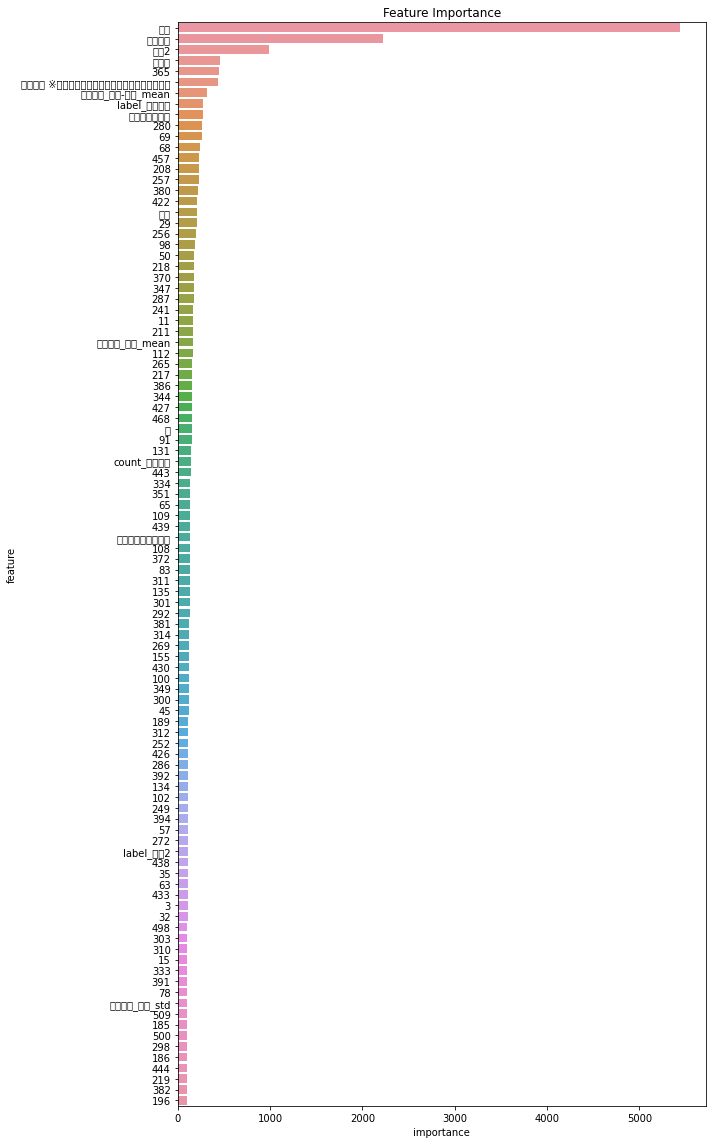

In [7]:
params = {
    'boosting': "dart", # dart, gbdt, goss, rf
    'objective': "binary", # binary, multiclass, regression
    'metric': "binary_logloss", # mae, mse, auc, binary_logloss, multi_logloss, rmse, average_precision
    'learning_rate':0.05, #0.05
    'n_estimators': 210,
    'max_depth': -1,
    'random_state' : 42531,
    'num_leaves' : 100, #カーディナリティが高い場合は大きくする
    #'max_bin' : 500,
}

result = run_experiment(params,
                        train[num_cols + cat_cols],
                        train[target_col],
                        test[num_cols + cat_cols],
                        cv=StratifiedKFold(5, shuffle=True, random_state=42531), #cv=5,
                        #groups=train.group
                        )

In [8]:
print(result.metrics) # Evalulation metrics for each fold

[0.7993035426731079, 0.7923228663446054, 0.8403220611916264, 0.7998550724637682, 0.8262499900272057, 0.8110813322621949]


In [18]:
print(result.metrics) # Evalulation metrics for each fold

[0.7908172302737521, 0.7850322061191626, 0.8267069243156199, 0.8143357487922706, 0.8313959518433713, 0.8081273433162665]


In [10]:
print(result.metrics) # Evalulation metrics for each fold

[0.7830434782608695, 0.7822745571658616, 0.8266908212560387, 0.8261433172302737, 0.8351138095276086, 0.8096638097616974]


In [9]:
print(result.metrics) # Evalulation metrics for each fold

[0.7725885668276973, 0.7818236714975845, 0.8162882447665056, 0.817194041867955, 0.8370046513112228, 0.8053098184368901]


In [19]:
result.importance     # Feature importance for each fold

[                       feature   importance
 0                           緯度    10.161530
 1                           経度    37.595751
 2                           開始    31.170259
 3                           終了    13.226240
 4                        緯度*経度     5.464760
 ..                         ...          ...
 755  都道府県 ※美工品は「所有者住所（所在都道府県）」   154.023210
 756                        所在地   241.884701
 757                    保管施設の名称    42.421620
 758                       所有者名  2583.606858
 759                  管理団体又は責任者    26.926740
 
 [760 rows x 2 columns],
                        feature   importance
 0                           緯度     7.616150
 1                           経度    14.550500
 2                           開始    38.994900
 3                           終了     6.883920
 4                        緯度*経度     0.000000
 ..                         ...          ...
 755  都道府県 ※美工品は「所有者住所（所在都道府県）」   128.481279
 756                        所在地   346.389591
 757                    保管施設

In [9]:
print(result.test_prediction)  # Test prediction in numpy array
print(result.oof_prediction)   # Out-of-fold prediction in numpy array

[0.00912354 0.17329534 0.49714433 ... 0.06563206 0.01198669 0.00829253]
[0.00824545 0.07079112 0.36202942 ... 0.06174887 0.05647612 0.00761172]


In [10]:
train[target_col].to_numpy()

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
# データ全体のF1スコアを計算 & 閾値の最適化
from sklearn.metrics import f1_score

def find_optimal_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_score = 0

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        score = f1_score(y_true, y_pred)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return best_threshold, best_score

# 例として使用するデータ（実際にはモデルからの予測値と実際のラベルを使用）
y_true = train[target_col].values
y_scores = result.oof_prediction

best_threshold, best_f1_score = find_optimal_threshold(y_true, y_scores)
print(f"Best threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

Best threshold: 0.12121212121212122
Best F1 Score: 0.36423841059602646


In [12]:
# 閾値を超える確率を持つ要素を1に、それ以外を0に変換
y_pred = (result.test_prediction > best_threshold).astype(int)
print(y_pred)
print(y_pred.shape)

[0 1 1 ... 0 0 0]
(10065,)


In [13]:
sample_submission['is_kokuhou'] = y_pred
sample_submission

,is_kokuhou
0,0
1,1
2,1
3,0
4,0
...,...
10060,0
10061,0
10062,0
10063,0


In [15]:
sample_submission["is_kokuhou"].value_counts()

0    8868
1    1197
Name: is_kokuhou, dtype: int64

In [16]:
sample_submission.to_csv('lightgbm_ver6.csv', index=False)

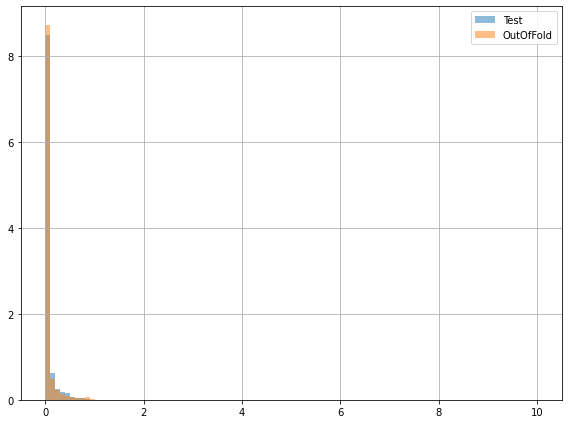

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

vmax = .02
bins = np.linspace(0, 10, 100)
ax.hist(result.test_prediction, bins=bins, density=True, alpha=.5, label="Test")
ax.hist(result.oof_prediction, bins=bins, density=True, alpha=.5, label="OutOfFold")
ax.grid()
ax.legend()
# ax.set_title("テストと学習時の予測傾向差分")

fig.tight_layout()